<a href="https://colab.research.google.com/github/sachincs3108/portfolioprojects/blob/main/Queuing_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**discrete event simulation on a single-server queuing system**

The objective of running a simulation is to measure the performance of the system a priori and observe its behavior under predefined situations.
The elements of the system are simply the customers and the server and both can be persons or objects:
Customer: Receives the service
Server: Provides the service
In this queuing system, one only server caters the arriving customers, which after being served leave the system. For the sake of simplicity we’ll assume that customers arrive at intervals following a uniform distribution, and the service time by the server also follow a uniform distribution.
Next arrival time is generated each time a customer arrives, meaning that when a customer arrives, we random sample inter-arrival time and compute the arrival time of the next customer. Similarly, when the customer goes to the server, we random sample the service time and compute the departure time of that customer. There will be times that customers arrive when there is still a customer being served, so they’d have to wait in the queue until the current customer departs and server is available. The flowchar below explains this in more details.


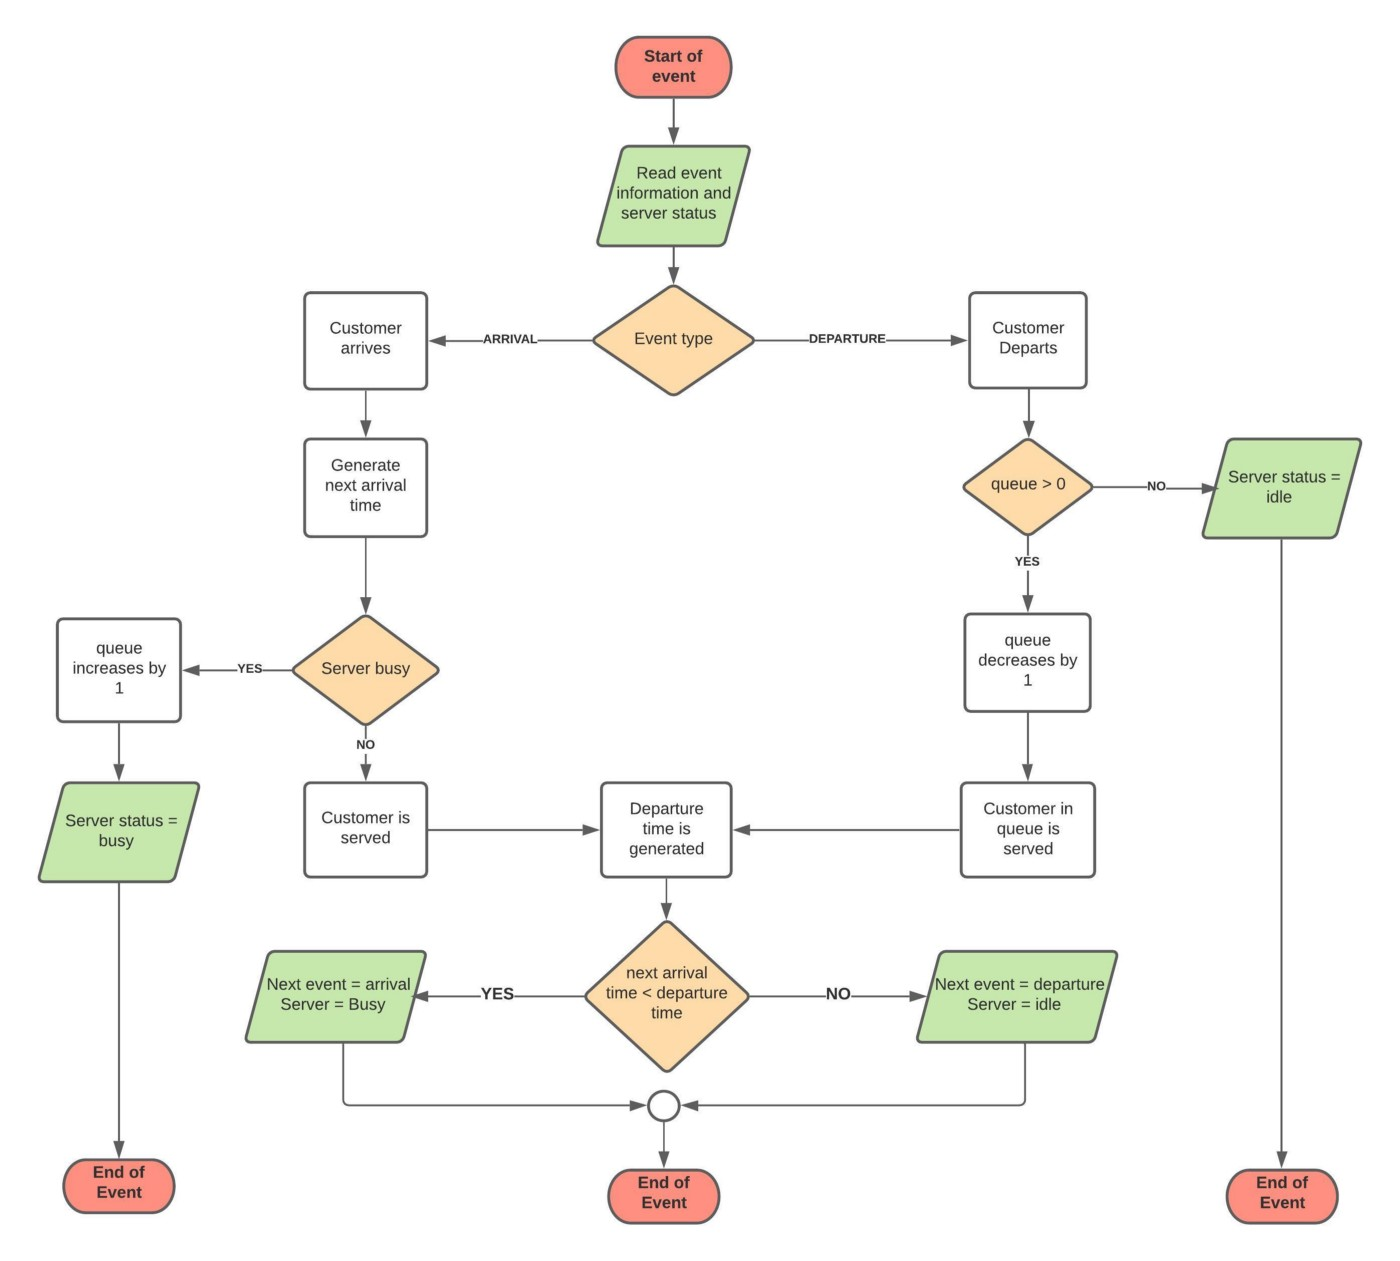

**Model**

We will use the numpy and pandas libraries to create the system. The random generated inter-arrival and service times are obtained with the numpy.random.uniform() function, which takes the minimum and maximum values of the uniform distribution as arguments.
Fist we import the needed libraries and define the parameters of the problem: We assume inter-arrival and service time follow a uniform distribution, with maximum values of 5 and 6 minutes, for inter-arrival and service times respectively. Similarly, we assume minimum values of 3 and 2 minutes for inter-arrival and service times respectively. For this exercise, we set the number of events to simulate to 30.

In [ ]:
import numpy as np
import pandas as pd

### problem PARAMETERS #######
inter_arrival_max = 5
inter_arrival_min = 3

service_time_max = 6
service_time_min = 2

n_events = 30

Then, the system in initialized at dummy event zero, which generates the first arrival time with the numpy.random.uniform() function. By default, the first event is an arrival while the status of the server at first arrival time is idle and queue is zero. Event zero is completed and event counter is increased (to 1).

In [ ]:
np.random.seed(42)
event = 0

#at event zero time is also zero
time_ = 0
#create counters for arrived and served customers
arrived_customers = 0
served_customers = 0
departed_customers = 0

#generate random variables for next events
interarrival_time = np.random.uniform(inter_arrival_min, inter_arrival_max)
next_arrival_time = time_ + interarrival_time
server_status = "idle"
queue = 0
arrived_customers += 1

### event zero done
event += 1  
#create timeseries and populate with event 1 details
ts_columns = ['event', 'time', 'type', 
              'queue', 'arr cust', 'served cust', 'depar cust']

time_series =  pd.DataFrame([[1, float(next_arrival_time), "arrival", 
                              queue, arrived_customers, 0, 0]],
                             columns = ts_columns)

Each event details are added to a data frame so at the end we can have the events in a tabular manner for better understanding, so once the initial status of the server at event 1 is determined; we create this data frame with the values obtained previously.

In [ ]:
time_series

,event,time,type,queue,arr cust,served cust,depar cust
0,1,3.749080,arrival,0,1,1,0
1,2,8.650509,arrival,1,2,0,0
2,3,8.677056,departure,0,0,2,1
3,4,11.301131,departure,0,0,0,2
4,5,12.847826,arrival,0,3,3,0
5,6,15.080160,departure,0,0,0,3
6,7,16.159815,arrival,0,4,4,0
7,8,20.564275,departure,0,0,0,4
8,9,20.892167,arrival,0,5,5,0
9,10,22.974505,departure,0,0,0,5


Now, each arrival generates the next arrival time in the simulation and according to the queuing system (and common sense), if the queue is zero, the arriving customer will go straight to the server. Therefore, this arrival is going to generate two events: Departure time of this arriving customer and the arrival time of the next customer.
Below is the code that will run the rest of the events from event one and get the arrival and departure time of each customer according to the flow chart.

In [ ]:
while event <= n_events:
    #event starts
    #parameters at event t
    event_type = time_series['type'].iloc[event-1]
    time_ = time_series['time'].iloc[event-1]

    #IF EVENT IS AN ARRIVAL #####################################
    if event_type == "arrival":
        #arrival event generate by default next arrival time
        
        #counter of arrived customers increases by 1
        arrived_customers += 1
        
        #generate next arrival time
        interarrival_time = np.random.uniform(inter_arrival_min, inter_arrival_max)
        next_arrival_time = time_ + interarrival_time  

        #if server status is idle customer is served immediatly 
        #and generates service time
        if server_status == "idle":
            #customer is served and counter of served customer increases by 1
            served_customers += 1
            #this customer number is added to the 'served customer' column at event n
            time_series['served cust'].iloc[event-1] =  served_customers

            #generate next events (service and departure time)
            service_time = np.random.uniform(service_time_min, service_time_max)
            departure_time = time_ + service_time
            departed_customers += 1 #same customer that is served at arrival time departs are departure time

            #add generated events to existing time series
            generated_events =  pd.DataFrame([
                          [99, float(departure_time), "departure", 0, 0,0,  departed_customers],
                          [99, float(next_arrival_time), "arrival", 0, arrived_customers, 0, 0]
                          ], columns = ts_columns) 
                          #Order doesnt matter because it's sorted next

            time_series =  pd.concat([time_series, generated_events])
            #events are sorted by time 
            time_series = time_series.sort_values(['time'])
            time_series.reset_index(drop=True, inplace=True)
            #event number is assigned by time order
            time_series['event'] = list(range(1, time_series.shape[0]+1))

            #event is finished and event counter increases
            event += 1 

        #if server status is busy increase queue and only generates arrival activity
        if server_status == "busy":
            queue += 1
            #add generated events to existing time series
            generated_events =  pd.DataFrame([
                                [99, float(next_arrival_time), "arrival", 
                                 0, arrived_customers,0, 0]]
                                , columns = ts_columns) 

            time_series =  pd.concat([time_series, generated_events])
            time_series = time_series.sort_values(['time'])
            time_series.reset_index(drop=True, inplace=True)
            time_series['event'] = list(range(1, time_series.shape[0]+1))
            time_series['queue'].iloc[event-1] = queue
            #event is finished and event counter increases
            event += 1 

    #IF EVENT IS A DEPARTURE ####################################
    if event_type == "departure":
        
        #if queue is zero and customer departs, server status remains idle and next event is an arrival
        if queue == 0 :
            server_status = "idle"
            #event is finished and event counter increases
            #nothing else happens untill next arrival
            event += 1

        #if there are customers in queue (>0), server changes to busy and queue decreases by one   
        if queue != 0 :
            #customer is served and counter of served customer increases by 1
            served_customers += 1
            #this customer number is added to the 'served customer' column at event n
            time_series['served cust'].iloc[event-1] =  served_customers           
            
            #queue decreases by one
            queue -= 1
            server_status = "busy"
            
            #generate next events (service and departure time)
            service_time = np.random.uniform(service_time_min, service_time_max)
            departure_time = time_ + service_time
            departed_customers += 1 #same customer that is served at arrival time departs are departure time

            #add generated events to existing time series
            generated_events =  pd.DataFrame([
                                    [99, float(departure_time), "departure", 0, 0, 0, departed_customers]
                                    ], columns = ts_columns) 

            time_series =  pd.concat([time_series, generated_events])
            time_series = time_series.sort_values(['time'])
            time_series.reset_index(drop=True, inplace=True)
            time_series['event'] = list(range(1, time_series.shape[0]+1)) 
            time_series['queue'].iloc[event-1] = queue

            #event is finished and event counter increases
            event += 1 

    #once event is finished, determine server status for next event
    #if the next arrival if before the departure of current customer, server will be busy at arrival
    if next_arrival_time < departure_time:
        server_status = "busy" 
    else: 
        server_status = "idle"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


At the end of all the iterations, the resulting data frame looks like this:

In [ ]:
time_series

,event,time,type,queue,arr cust,served cust,depar cust
0,1,3.749080,arrival,0,1,1,0
1,2,8.650509,arrival,1,2,0,0
2,3,8.677056,departure,0,0,2,1
3,4,11.301131,departure,0,0,0,2
4,5,12.847826,arrival,0,3,3,0
5,6,15.080160,departure,0,0,0,3
6,7,16.159815,arrival,0,4,4,0
7,8,20.564275,departure,0,0,0,4
8,9,20.892167,arrival,0,5,5,0
9,10,22.974505,departure,0,0,0,5


One caveat is that the loop stops at n_events, so the system stops arbitrarily when the number of events required is reached. This means that one customer might be already in the system but it will not be served when the simulation stops. For instance, below are the five last events of the run, and while customers 16 and 17 are expected to arrive before the run stops, these customer will not be served. Therefore, we can simply remove these two rows and keep only the customers that left the system.



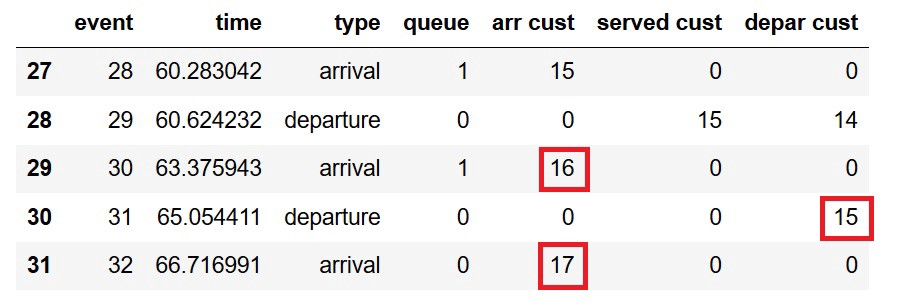

Lastly, we create a summary of the event times per customer and compute their respective time spent in the queue, server and system: from where we can compute averages, etc. If needed.

In [ ]:
#create summary of customer data with results

#get arriving customers
arrivals = time_series.loc[time_series['type'] == 'arrival', ['time', 'arr cust' ]]
arrivals.columns = ['time', 'customer']
#get departing customers
depature = time_series.loc[time_series['type'] == 'departure', ['time', 'depar cust' ]]
depature.columns = ['time', 'customer']
#get customers being served
serving = time_series.loc[time_series['served cust'] != 0 , ['time', 'served cust' ]]
serving.columns = ['time', 'customer']

#merge 
customer_df = arrivals.merge(depature, on='customer')
customer_df = customer_df.merge(serving, on='customer')
customer_df.columns = ['arrival time', 'customer', 'departure time', 'serving time']
customer_df = customer_df[['customer', 'arrival time', 'serving time', 'departure time']] 

#get time in queue
customer_df['time in queue'] = customer_df['serving time'] - customer_df['arrival time'] 
#get time in system
customer_df['time in system'] = customer_df['departure time'] - customer_df['arrival time'] 
#get time in server
customer_df['time in server'] = customer_df['departure time'] - customer_df['serving time'] 
#round all floats to 2 digits
customer_df = customer_df.round(2)

Below are the five first rows of the resulting data frame from the code above with the times per customer:

In [ ]:
customer_df.head(5)

,customer,arrival time,serving time,departure time,time in queue,time in system,time in server
0,1,3.75,3.75,8.68,0.00,4.93,4.93
1,2,8.65,8.68,11.30,0.03,2.65,2.62
2,3,12.85,12.85,15.08,0.00,2.23,2.23
3,4,16.16,16.16,20.56,0.00,4.40,4.40
4,5,20.89,20.89,22.97,0.00,2.08,2.08
